In [1]:
# Поскольку в открытом доступе отстутствует информация о количестве пользователей LLM в целом, берем за основу статистику по самой первой и популярной в мире линейке моделей - ChatGPT (https://www.businessofapps.com/data/chatgpt-statistics/)

In [2]:
import pandas as pd

raw_data = {
    "December 2022": 1,
    "January 2023": 57,
    "February 2023": 100,
    "September 2023": 150,
    "August 2024": 200,
    "October 2024": 250,
    "December 2024": 300
}

df_raw = pd.DataFrame(list(raw_data.items()), columns=["month", "users_million"])
df_raw["month"] = pd.to_datetime(df_raw["month"], format="%B %Y")
df_raw = df_raw.set_index("month").sort_index()

full_range = pd.date_range("2021-01", "2024-12", freq="MS")

df = pd.DataFrame(index=full_range)
df = df.join(df_raw)

cutoff = pd.to_datetime("2022-11")
df.loc[df.index <= cutoff, "users_million"] = 0

df["users_million"] = df["users_million"].interpolate(method="linear")

df = df.reset_index().rename(columns={"index": "month"})
df["month"] = df["month"].dt.strftime("%Y-%m")

df.to_csv("chatgpt_users.csv", index=False)

print(df)



      month  users_million
0   2021-01       0.000000
1   2021-02       0.000000
2   2021-03       0.000000
3   2021-04       0.000000
4   2021-05       0.000000
5   2021-06       0.000000
6   2021-07       0.000000
7   2021-08       0.000000
8   2021-09       0.000000
9   2021-10       0.000000
10  2021-11       0.000000
11  2021-12       0.000000
12  2022-01       0.000000
13  2022-02       0.000000
14  2022-03       0.000000
15  2022-04       0.000000
16  2022-05       0.000000
17  2022-06       0.000000
18  2022-07       0.000000
19  2022-08       0.000000
20  2022-09       0.000000
21  2022-10       0.000000
22  2022-11       0.000000
23  2022-12       1.000000
24  2023-01      57.000000
25  2023-02     100.000000
26  2023-03     107.142857
27  2023-04     114.285714
28  2023-05     121.428571
29  2023-06     128.571429
30  2023-07     135.714286
31  2023-08     142.857143
32  2023-09     150.000000
33  2023-10     154.545455
34  2023-11     159.090909
35  2023-12     163.636364
3

In [3]:
#Учитывая, что ChatGPT появился в ноябре 2022 г, в предыдущие периоды число пользователей берем равным 0. Поскольку данные представлены не по всем месяцам, экстраполируем значения, учитывая тренд

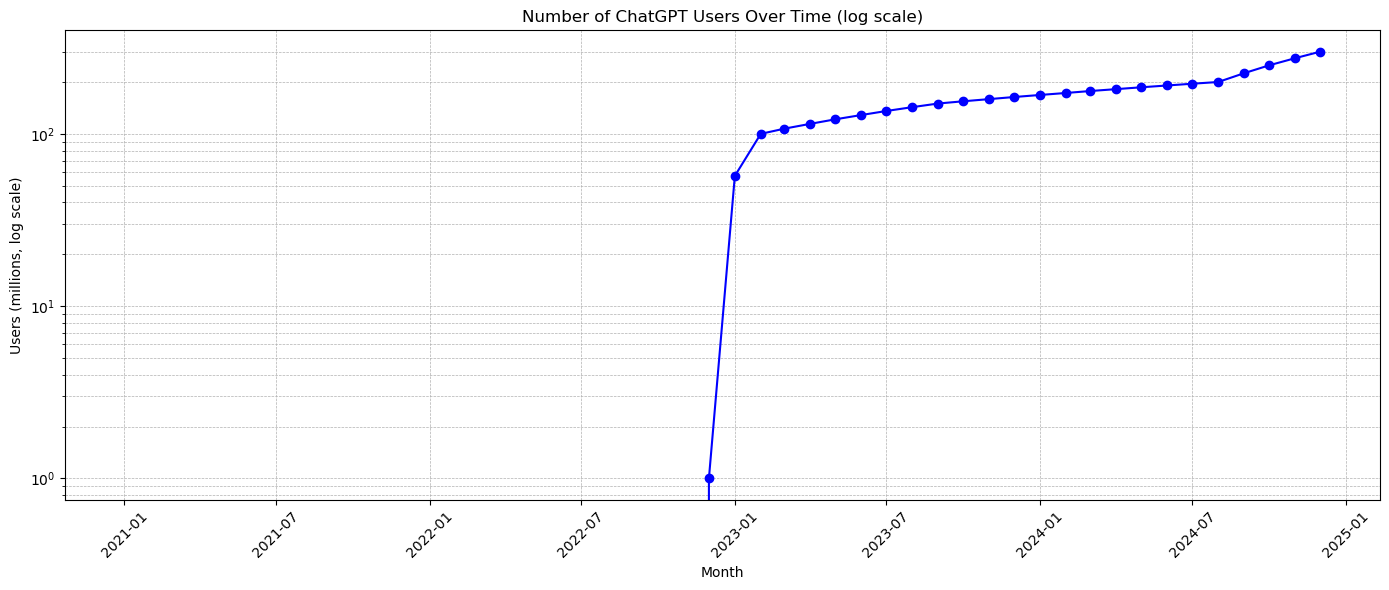

In [4]:
import matplotlib.pyplot as plt


df = pd.read_csv("chatgpt_users.csv")

df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

plt.figure(figsize=(14,6))
plt.plot(df["month"], df["users_million"], marker='o', linestyle='-', color='blue')

plt.yscale("log") 
plt.xticks(rotation=45)
plt.title("Number of ChatGPT Users Over Time (log scale)")
plt.xlabel("Month")
plt.ylabel("Users (millions, log scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [5]:
#Учитывая значительный разброс данных (от 1 до 300 млн),выбираем логарифмическую шкалу. Для наглядности, показываем динамику роста числа пользователей ChatGPT

In [6]:
import numpy as np

raw_data = {
    "Q4 2022": 250000,
    "Q1 2023": 1200000,
    "Q2 2023": 2400000,
    "Q3 2023": 3300000,
    "Q4 2023": 4600000,
    "Q1 2024": 9800000
}

quarters = []
users = []

for year in [2021, 2022, 2023, 2024]:
    for quarter in [1, 2, 3, 4]:
        quarter_str = f"Q{quarter} {year}"
        quarters.append(quarter_str)
        if quarter_str in raw_data:
            users.append(raw_data[quarter_str])
        else:
            users.append(np.nan)

df = pd.DataFrame({
    "quarter": quarters,
    "users": users
})

df["index"] = range(len(df))

known_data = df.dropna()
if len(known_data) > 1:
    x_known = known_data["index"].values
    y_known = np.log(known_data["users"].values)
    
    coefficients = np.polyfit(x_known, y_known, 1)
    trend_line = np.poly1d(coefficients)

    for i, row in df.iterrows():
        if pd.isna(row["users"]):
            predicted_log = trend_line(row["index"])
            df.at[i, "users"] = np.exp(predicted_log)

df["users"] = df["users"].round().astype(int)

df = df[["quarter", "users"]]

df.to_csv("quarterly_users.csv", index=False)

print("Полные данные с экстраполяцией:")
print(df.to_string(index=False))

Полные данные с экстраполяцией:
quarter    users
Q1 2021     4605
Q2 2021     8807
Q3 2021    16843
Q4 2021    32211
Q1 2022    61601
Q2 2022   117808
Q3 2022   225299
Q4 2022   250000
Q1 2023  1200000
Q2 2023  2400000
Q3 2023  3300000
Q4 2023  4600000
Q1 2024  9800000
Q2 2024 21079065
Q3 2024 40312152
Q4 2024 77094010


In [7]:
#Берем данные по количеству фишинговых атак из отчетов SlashNext (https://www.securitymagazine.com/articles/98536-over-255m-phishing-attacks-in-2022-so-far, https://newsletter.radensa.ru/wp-content/uploads/2023/10/SlashNext-The-State-of-Phishing-Report-2023.pdf, https://socradar.io/phishing-in-2024-4151-increase-since-chatgpt/

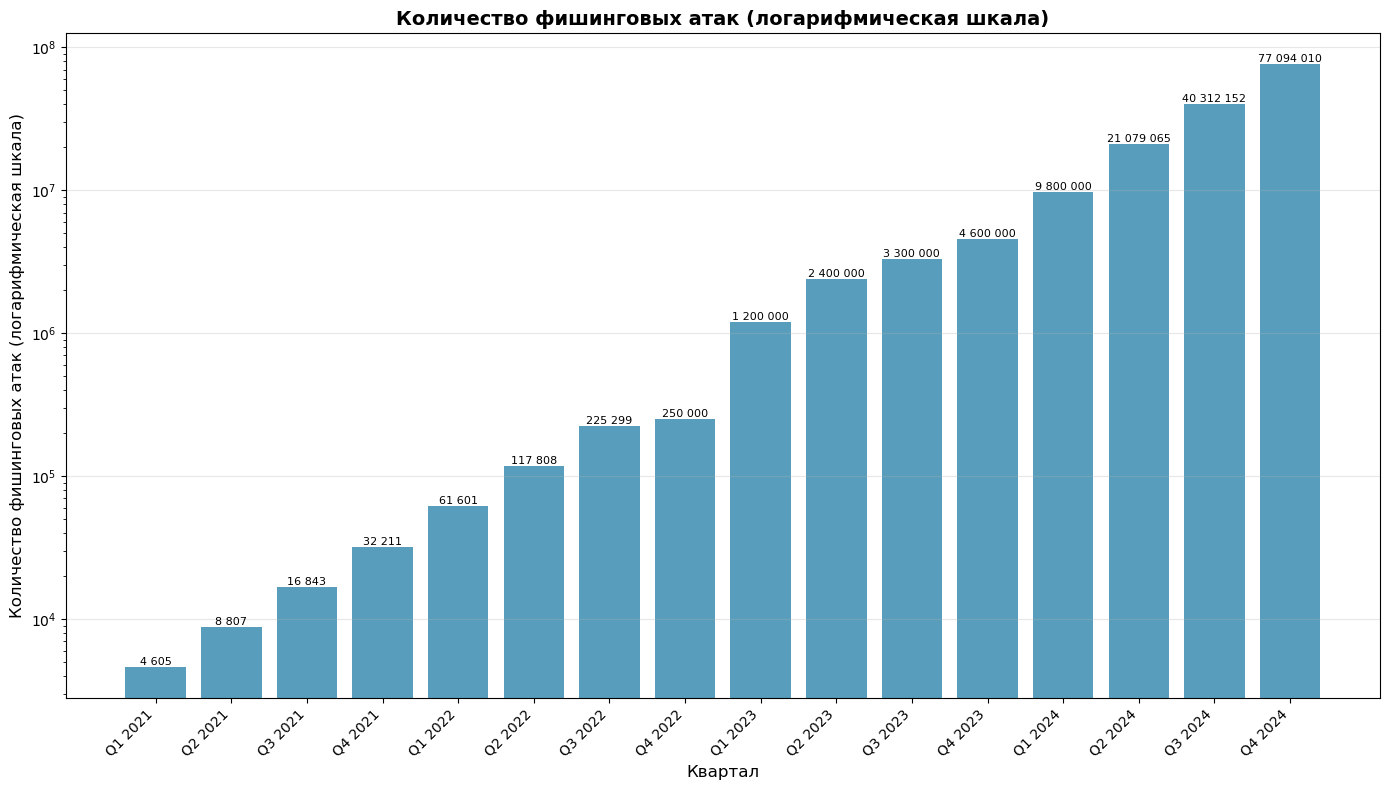

Полные данные с экстраполяцией:
quarter    users
Q1 2021     4605
Q2 2021     8807
Q3 2021    16843
Q4 2021    32211
Q1 2022    61601
Q2 2022   117808
Q3 2022   225299
Q4 2022   250000
Q1 2023  1200000
Q2 2023  2400000
Q3 2023  3300000
Q4 2023  4600000
Q1 2024  9800000
Q2 2024 21079065
Q3 2024 40312152
Q4 2024 77094010


In [8]:
raw_data = {
    "Q4 2022": 250000,
    "Q1 2023": 1200000,
    "Q2 2023": 2400000,
    "Q3 2023": 3300000,
    "Q4 2023": 4600000,
    "Q1 2024": 9800000
}

quarters = []
users = []

for year in [2021, 2022, 2023, 2024]:
    for quarter in [1, 2, 3, 4]:
        quarter_str = f"Q{quarter} {year}"
        quarters.append(quarter_str)
        if quarter_str in raw_data:
            users.append(raw_data[quarter_str])
        else:
            users.append(np.nan)

df = pd.DataFrame({
    "quarter": quarters,
    "users": users
})

df["index"] = range(len(df))

known_data = df.dropna()
if len(known_data) > 1:
    x_known = known_data["index"].values
    y_known = np.log(known_data["users"].values)
    
    coefficients = np.polyfit(x_known, y_known, 1)
    trend_line = np.poly1d(coefficients)
    
    for i, row in df.iterrows():
        if pd.isna(row["users"]):
            predicted_log = trend_line(row["index"])
            df.at[i, "users"] = np.exp(predicted_log)

df["users"] = df["users"].round().astype(int)

df = df[["quarter", "users"]]

plt.figure(figsize=(14, 8))

bars = plt.bar(df['quarter'], df['users'], color='#2E86AB', alpha=0.8)

plt.yscale('log')

plt.title('Количество фишинговых атак (логарифмическая шкала)', fontsize=14, fontweight='bold')
plt.xlabel('Квартал', fontsize=12)
plt.ylabel('Количество фишинговых атак (логарифмическая шкала)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:,}'.replace(',', ' '),
                ha='center', va='bottom', rotation=0, fontsize=8)

add_value_labels(bars)

plt.tight_layout()

plt.show()

df.to_csv("quarterly_users.csv", index=False)

print("Полные данные с экстраполяцией:")
print(df.to_string(index=False))

In [9]:
#Заполняем отсутствующие значения (через экстраполяцию), рисуем гистограмму

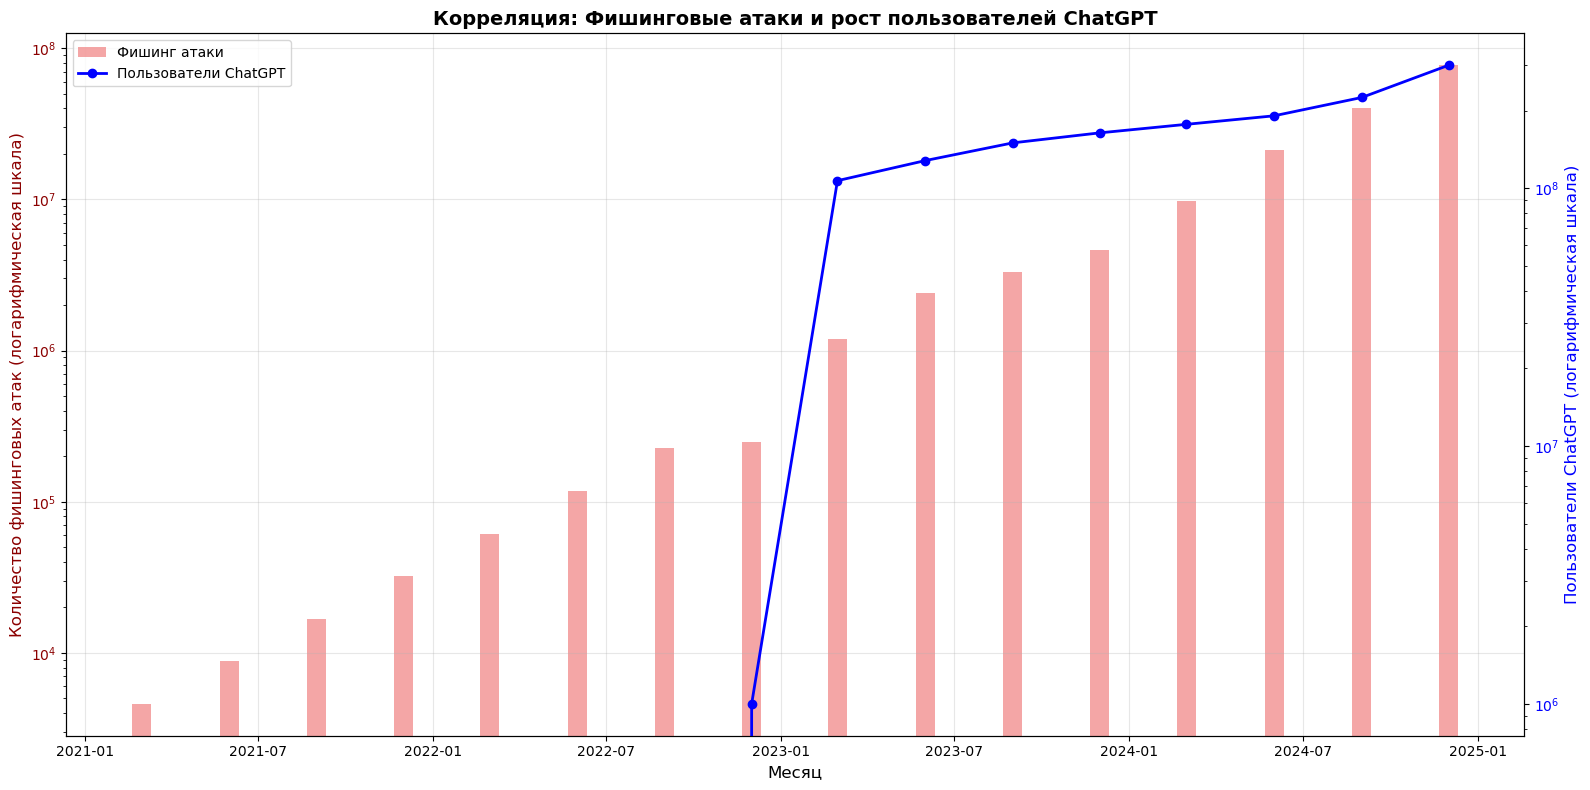

Объединенные данные:
     month  users_phishing  users_chatgpt
2021-03-01            4605              0
2021-06-01            8807              0
2021-09-01           16843              0
2021-12-01           32211              0
2022-03-01           61601              0
2022-06-01          117808              0
2022-09-01          225299              0
2022-12-01          250000        1000000
2023-03-01         1200000      107000000
2023-06-01         2400000      128000000
2023-09-01         3300000      150000000
2023-12-01         4600000      164000000
2024-03-01         9800000      177000000
2024-06-01        21079065      191000000
2024-09-01        40312152      225000000
2024-12-01        77094010      300000000


In [10]:
raw_data = {
    "Q4 2022": 250000,
    "Q1 2023": 1200000,
    "Q2 2023": 2400000,
    "Q3 2023": 3300000,
    "Q4 2023": 4600000,
    "Q1 2024": 9800000
}

quarters = []
users_phishing = []

for year in [2021, 2022, 2023, 2024]:
    for quarter in [1, 2, 3, 4]:
        quarter_str = f"Q{quarter} {year}"
        quarters.append(quarter_str)
        if quarter_str in raw_data:
            users_phishing.append(raw_data[quarter_str])
        else:
            users_phishing.append(np.nan)

df_phishing = pd.DataFrame({
    "quarter": quarters,
    "users_phishing": users_phishing
})

df_phishing["index"] = range(len(df_phishing))
known_data = df_phishing.dropna()

if len(known_data) > 1:
    x_known = known_data["index"].values
    y_known = np.log(known_data["users_phishing"].values)
    coefficients = np.polyfit(x_known, y_known, 1)
    trend_line = np.poly1d(coefficients)
    
    for i, row in df_phishing.iterrows():
        if pd.isna(row["users_phishing"]):
            predicted_log = trend_line(row["index"])
            df_phishing.at[i, "users_phishing"] = np.exp(predicted_log)

df_phishing["users_phishing"] = df_phishing["users_phishing"].round().astype(int)

def quarter_to_date(quarter_str):
    quarter, year = quarter_str.split()
    quarter_num = int(quarter[1])
    year_num = int(year)
    month = quarter_num * 3
    return pd.Timestamp(year=year_num, month=month, day=1)

df_phishing["month"] = df_phishing["quarter"].apply(quarter_to_date)

chatgpt_data = {
    "2021-03": 0, "2021-06": 0, "2021-09": 0, "2021-12": 0,
    "2022-03": 0, "2022-06": 0, "2022-09": 0, "2022-12": 1000,
    "2023-03": 107000, "2023-06": 128000, "2023-09":150000, "2023-12": 164000,
    "2024-03": 177000, "2024-06": 191000, "2024-09": 225000, "2024-12": 300000
}

df_chatgpt = pd.DataFrame(list(chatgpt_data.items()), columns=["month", "users_chatgpt"])
df_chatgpt["month"] = pd.to_datetime(df_chatgpt["month"], format="%Y-%m")
df_chatgpt["users_chatgpt"] = df_chatgpt["users_chatgpt"] * 1000  # преобразуем в абсолютные числа

df_combined = pd.merge(df_phishing, df_chatgpt, on="month", how="outer").sort_values("month")

fig, ax1 = plt.subplots(figsize=(16, 8))

bars = ax1.bar(df_combined["month"], df_combined["users_phishing"], 
               alpha=0.7, color='lightcoral', label='Фишинг атаки', width=20)

ax1.set_yscale('log')
ax1.set_ylabel('Количество фишинговых атак (логарифмическая шкала)', fontsize=12, color='darkred')
ax1.tick_params(axis='y', labelcolor='darkred')
ax1.set_xlabel('Месяц', fontsize=12)

ax2 = ax1.twinx()
line = ax2.plot(df_combined["month"], df_combined["users_chatgpt"], 
                marker='o', linestyle='-', color='blue', linewidth=2, 
                markersize=6, label='Пользователи ChatGPT')

ax2.set_yscale('log')
ax2.set_ylabel('Пользователи ChatGPT (логарифмическая шкала)', fontsize=12, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Корреляция: Фишинговые атаки и рост пользователей ChatGPT', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
ax1.grid(True, alpha=0.3)

plt.tight_layout()

plt.show()

df_combined[["month", "users_phishing", "users_chatgpt"]].to_csv("combined_data.csv", index=False)

print("Объединенные данные:")
print(df_combined[["month", "users_phishing", "users_chatgpt"]].to_string(index=False))

In [11]:
#представляем оба графика вместе, видим резкий рост числа фишинговых атак после появления ChatGPT. Дальнейшая динамика развития также говорит о наличии корреляции

In [12]:
from scipy import stats

raw_data = {
    "Q4 2022": 250000,
    "Q1 2023": 1200000,
    "Q2 2023": 2400000,
    "Q3 2023": 3300000,
    "Q4 2023": 4600000,
    "Q1 2024": 9800000
}

quarters = []
users_phishing = []

for year in [2021, 2022, 2023, 2024]:
    for quarter in [1, 2, 3, 4]:
        quarter_str = f"Q{quarter} {year}"
        quarters.append(quarter_str)
        if quarter_str in raw_data:
            users_phishing.append(raw_data[quarter_str])
        else:
            users_phishing.append(np.nan)

df_phishing = pd.DataFrame({
    "quarter": quarters,
    "users_phishing": users_phishing
})

df_phishing["index"] = range(len(df_phishing))
known_data = df_phishing.dropna()

if len(known_data) > 1:
    x_known = known_data["index"].values
    y_known = np.log(known_data["users_phishing"].values)
    coefficients = np.polyfit(x_known, y_known, 1)
    trend_line = np.poly1d(coefficients)
    
    for i, row in df_phishing.iterrows():
        if pd.isna(row["users_phishing"]):
            predicted_log = trend_line(row["index"])
            df_phishing.at[i, "users_phishing"] = np.exp(predicted_log)

df_phishing["users_phishing"] = df_phishing["users_phishing"].round().astype(int)

def quarter_to_date(quarter_str):
    quarter, year = quarter_str.split()
    quarter_num = int(quarter[1])
    year_num = int(year)
    month = quarter_num * 3
    return pd.Timestamp(year=year_num, month=month, day=1)

df_phishing["month"] = df_phishing["quarter"].apply(quarter_to_date)

chatgpt_data = {
    "2021-03": 0, "2021-06": 0, "2021-09": 0, "2021-12": 0,
    "2022-03": 0, "2022-06": 0, "2022-09": 0, "2022-12": 1000,
    "2023-03": 107000, "2023-06": 128000, "2023-09": 150000, "2023-12": 164000,
    "2024-03": 177000, "2024-06": 191000, "2024-09": 225000, "2024-12": 300000
}

df_chatgpt = pd.DataFrame(list(chatgpt_data.items()), columns=["month", "users_chatgpt"])
df_chatgpt["month"] = pd.to_datetime(df_chatgpt["month"], format="%Y-%m")

df_combined = pd.merge(df_phishing, df_chatgpt, on="month", how="inner").sort_values("month")

df_clean = df_combined.dropna(subset=["users_phishing", "users_chatgpt"])

pearson_corr, pearson_p = stats.pearsonr(df_clean["users_chatgpt"], df_clean["users_phishing"])
spearman_corr, spearman_p = stats.spearmanr(df_clean["users_chatgpt"], df_clean["users_phishing"])

print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")
print("=" * 40)
print(f"Пирсон:  {pearson_corr:.4f} (p-value: {pearson_p:.4f})")
print(f"Спирмен: {spearman_corr:.4f} (p-value: {spearman_p:.4f})")
print(f"Количество наблюдений: {len(df_clean)}")

print("\nИНТЕРПРЕТАЦИЯ ПИРСОНА:")
if pearson_p < 0.05:
    significance = "статистически значимая"
else:
    significance = "не значимая"

if abs(pearson_corr) < 0.3:
    strength = "слабая"
elif abs(pearson_corr) < 0.7:
    strength = "умеренная"
else:
    strength = "сильная"

if pearson_corr > 0:
    direction = "положительная"
else:
    direction = "отрицательная"

print(f"{strength} {direction} корреляция ({significance})")

print("\nИНТЕРПРЕТАЦИЯ СПИРМЕНА:")
if spearman_p < 0.05:
    significance = "статистически значимая"
else:
    significance = "не значимая"

if abs(spearman_corr) < 0.3:
    strength = "слабая"
elif abs(spearman_corr) < 0.7:
    strength = "умеренная"
else:
    strength = "сильная"

if spearman_corr > 0:
    direction = "положительная"
else:
    direction = "отрицательная"

print(f"{strength} {direction} корреляция ({significance})")

print("\nДАННЫЕ ДЛЯ ПРОВЕРКИ:")
print(df_clean[["month", "users_chatgpt", "users_phishing"]].to_string(index=False))

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ
Пирсон:  0.7893 (p-value: 0.0003)
Спирмен: 0.9579 (p-value: 0.0000)
Количество наблюдений: 16

ИНТЕРПРЕТАЦИЯ ПИРСОНА:
сильная положительная корреляция (статистически значимая)

ИНТЕРПРЕТАЦИЯ СПИРМЕНА:
сильная положительная корреляция (статистически значимая)

ДАННЫЕ ДЛЯ ПРОВЕРКИ:
     month  users_chatgpt  users_phishing
2021-03-01              0            4605
2021-06-01              0            8807
2021-09-01              0           16843
2021-12-01              0           32211
2022-03-01              0           61601
2022-06-01              0          117808
2022-09-01              0          225299
2022-12-01           1000          250000
2023-03-01         107000         1200000
2023-06-01         128000         2400000
2023-09-01         150000         3300000
2023-12-01         164000         4600000
2024-03-01         177000         9800000
2024-06-01         191000        21079065
2024-09-01         225000        40312152
2024-12-01         300000

In [13]:
#Для подтверждения гипотезы используем корреляции Пирсона и Спирмена. Обе показывают сильную положительную корреляцию. Тем не менее, простая корреляция не может служить прямым доказательством влияния развития AI на увеличение числа фишинговых атак. Более подробное изучение научных статей (например, https://arxiv.org/abs/2310.13715, https://www.mdpi.com/2673-2688/6/8/174) и отчетов (https://cybelangel.com/blog/rise-ai-phishing/, https://www.knowbe4.com/hubfs/Phishing-Threat-Trends-2025_Report.pdf) дало понимание, что злоумышленники активно используют AI для подготовки и реализации фишинговых атак.  

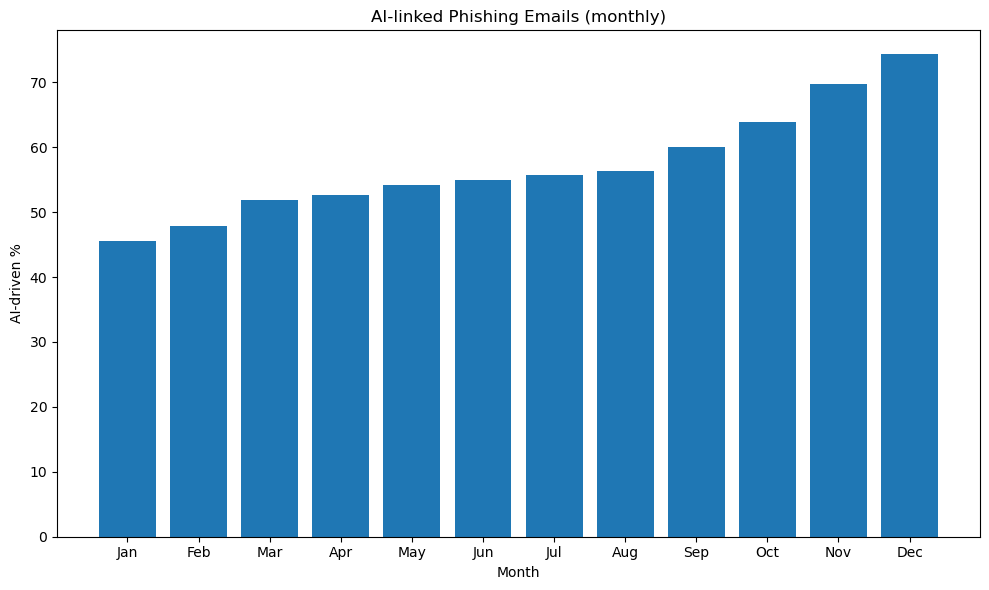

Saved phish_ai_hist.png


In [19]:
df = pd.read_csv("phish_ai.csv")

df.columns = [c.strip() for c in df.columns]

if "Month" not in df.columns and "month" in df.columns:
    df = df.rename(columns={"month": "Month"})
if "Polymorphic %" not in df.columns and "Value" in df.columns:
    df = df.rename(columns={"Value": "AI-driven %"})
elif "Polymorphic %" in df.columns:
    df = df.rename(columns={"Polymorphic %": "AI-driven %"})

if "Month" not in df.columns or "AI-driven %" not in df.columns:
    raise ValueError("CSV должен содержать столбцы 'Month' и 'AI-driven %'")

month_order = {"Jan": 1,"Feb": 2,"Mar": 3,"Apr": 4,"May": 5,"Jun": 6,"Jul": 7,"Aug": 8,"Sep": 9,"Oct": 10,"Nov": 11,"Dec": 12}

df_sorted = df.copy()
df_sorted["order"] = df_sorted["Month"].apply(lambda m: month_order.get(str(m).strip(), 99))
df_sorted = df_sorted.sort_values("order")

months = df_sorted["Month"].astype(str).tolist()
values = pd.to_numeric(df_sorted["AI-driven %"], errors="coerce").tolist()

plt.figure(figsize=(10,6))
plt.bar(months, values)
plt.xlabel("Month")
plt.ylabel("AI-driven %")
plt.title("AI-linked Phishing Emails (monthly)")
plt.tight_layout()
plt.savefig("phish_ai_hist.png", dpi=300)
plt.show()

print("Saved phish_ai_hist.png")

In [ ]:
#Согласно данным из отчета (https://www.knowbe4.com/hubfs/Phishing-Threat-Trends-2025_Report.pdf), в течение 2024 г. наблюдался значительный рост процента полиморфных атак с использованием AI от общего числа фишанга. Полиморфные атаки представляют собой рассылку типовых писем с небольшими изменениями для персонализации и обхода спам-фильтров. AI значительно упрощает проведение подобных кампаний.

In [ ]:
#Таким образом, статистическое подтверждение изначальной гипотезы о влиянии AI на рост фишинга привела нас к более детальному изучению проблемы, которое выявило как количественное подтверждение гипотезы (рост атак с использованием AI), так и качественные обоснования (описание возможностей, которые AI-инструменты дают злоумышленникам)